For this assignment, you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you in D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. The second part of assignment 3 has 50 points.


## Exercise 
1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.



### Github & D2L Submissions
Please create a **public** github repo and submit your answers on both **public github** and on **D2L**. Please include the link to your github repo in your submission. 

**Please follow the below guidelines regarding your github repository:**

The folder structure of your github account should be as followed:
                    
    ├── src                     # Source files (your python code)
    ├── data                    # Data related to the project (titanic.csv)
    ├── result                  # Result of the project (e.g., plots, reports)
    └── doc                     # Documentation files (additional documentations)

You must add **README.md** file to the root repository of your GitHub and explain all the directories in your GitHub repo in README file. Please look at this link as a [reference](https://help.github.com/en/github/creating-cloning-and-archiving-repositories/about-readmes) on how to write the README file.

Here is another great resource for organizing your folder and code on github. Reso

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, your final report and the structure of your github repo. 

In [208]:
#Code Available at: 
#https://github.com/sfc-gh-arath/Langara-CPSC-4800-W01-assignment3
#load the data files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
#read the CSV file
df = pd.read_csv("../data/titanic.csv")


In [188]:
#list columns in the file
df.info( show_counts=True)

#number of unique vlaues in each column
print(color.BOLD+"Number of unique vlaues in each column"+color.END)
print(df.nunique())

#lets change 0 to No and 1 to Yes for Survived
df['Survived'] = df['Survived'].replace(to_replace= {0:'NO',1:"YES"})
df['Pclass'] = df['Pclass'].replace(to_replace= {1:'1st',2:"2nd",3:"3rd"})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    object  
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  AgeBin       714 non-null    category
dtypes: category(1), float64(2), int64(4), object(6)
memory usage: 85.0+ KB
Number of unique vlaues in each column
PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Pa

,Pclass,Survived
Pclass,1.000000,-0.338481
Survived,-0.338481,1.000000


Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

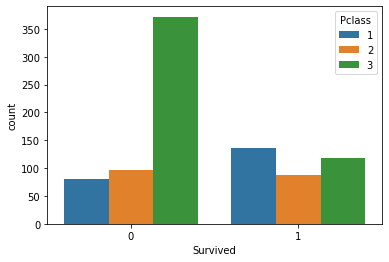

In [209]:
#Determine if the survival rate is associated to the class of passenger


#calculate all correlations in df
display(df[["Pclass","Survived"]].corr())
display(df.groupby(["Pclass","Survived"]).size())
sns.countplot(x='Survived',hue='Pclass',data=df)

Pclass      1st         2nd         3rd     
Sex      female male female male female male
Survived                                    
NO            3   77      6   91     72  300
YES          91   45     70   17     72   47

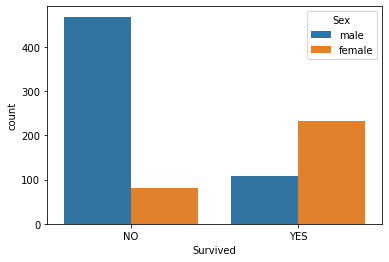

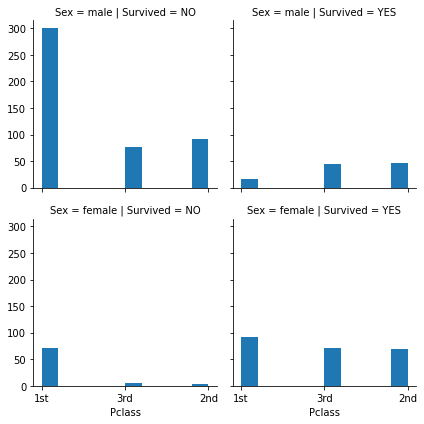

In [207]:
#Determine if the survival rate is associated to the class of passenger

#lets group by Survived, Pclass and Sex
display(df.groupby(["Pclass","Survived","Sex"]).size().reset_index().pivot(columns=['Pclass','Sex'], index='Survived', values=0))

#sample python code to craate a new DF
# df1 = df[["Pclass","Survived","Sex"]].value_counts().to_frame()
# df1 = df1.reset_index()
# df1.columns = ["Pclass","Survived","Sex","Size"]
# display(df1)
# df1.info()

#plot survival by Sex
sns.countplot(x='Survived',hue='Sex',data=df)

#Plot sex vs class vs survival rate
grid1 = sns.FacetGrid(df, col='Survived', row='Sex', height=3, aspect=1 )
grid1.map(plt.hist, 'Pclass')


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


<AxesSubplot:xlabel='SibSp', ylabel='count'>

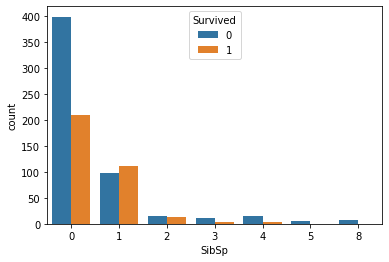

In [210]:
#analyze if survival rate was higehr if the passenger had siblings
print(df["SibSp"].value_counts())
sns.countplot(x='SibSp',hue='Survived',data=df)

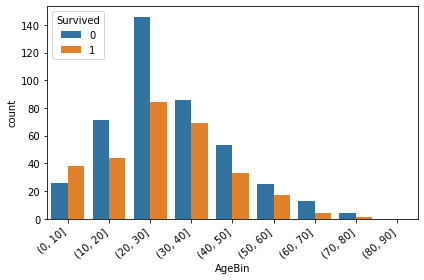

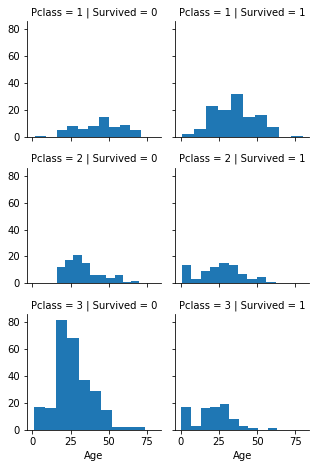

In [214]:
#Determine the survival rate is associated to the age
#bin the age groups by 10 years

bins = [0,10,20,30,40,50,60,70,80,90]
df['AgeBin'] = pd.cut(df['Age'],bins)
#display(df.groupby(["AgeBin","Pclass","Sex"]).size())
#display(df)
ax = sns.countplot(x='AgeBin',hue='Survived',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

#Plot age vs class vs survival rate
grid = sns.FacetGrid(df, col='Survived', row='Pclass', height=2.2,aspect=1)
grid.map(plt.hist, 'Age')
grid.add_legend();